In [2]:
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt


2023-11-20 18:21:37.601425: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-20 18:21:38.597285: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 18:21:38.597679: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 18:21:38.790745: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 18:21:39.345297: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-20 18:21:39.363187: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


In [4]:
img_path = 'poing.jpg'
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)


In [5]:
def load_model():
    model = VGG16(weights="imagenet", include_top=False, input_shape=img_array.shape)
    return model


<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png">


In [6]:
model = load_model()
model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [7]:
print(len(model.layers))
model.layers


19


In [8]:
last_convolutionnal_layer = model.layers[17]
last_convolutionnal_layer.weights[0].shape


TensorShape([3, 3, 512, 512])

In [9]:
layers_outputs = [layer.output for layer in model.layers]
layers_outputs


[<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 16, 16, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 16, 16, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 8, 8, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 8, 8, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 8, 8, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 4, 4, 256) dtype=float32 (created by layer 'block3_pool')>,
 <KerasTensor: shape=(

In [10]:
from tensorflow.keras import Model

activation_models = [Model(inputs=model.input, outputs=output) for output in layers_outputs]


In [11]:
img_array = np.expand_dims(img_array, axis=0)
img_array.shape


(1, 32, 32, 3)

In [12]:
activated_image = [m.predict(img_array) for m in activation_models]
len(activated_image)


1/1 [==============================] - 0s 389ms/step


19

In [13]:
[activation.shape for activation in activated_image]


[(1, 32, 32, 3),
 (1, 32, 32, 64),
 (1, 32, 32, 64),
 (1, 16, 16, 64),
 (1, 16, 16, 128),
 (1, 16, 16, 128),
 (1, 8, 8, 128),
 (1, 8, 8, 256),
 (1, 8, 8, 256),
 (1, 8, 8, 256),
 (1, 4, 4, 256),
 (1, 4, 4, 512),
 (1, 4, 4, 512),
 (1, 4, 4, 512),
 (1, 2, 2, 512),
 (1, 2, 2, 512),
 (1, 2, 2, 512),
 (1, 2, 2, 512),
 (1, 1, 1, 512)]

In [18]:
last_layer = model.get_layer('block5_pool')
model_extract = Model(inputs=model.input, outputs=last_layer.output)
model_extract.summary()


Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0  

In [20]:
activated_image = model_extract.predict(img_array)
activated_image.shape


1/1 [==============================] - 0s 34ms/step


(1, 1, 1, 512)

In [156]:
# Reshape the activations to have a shape (height, width, channels)
activated_image = np.squeeze(activated_image)  # Remove the batch dimension
height, width, channels = activated_image.shape

# Plot each channel of the activations
plt.figure(figsize=(10, 10))
for i in range(channels):
    plt.subplot(channels//4, 4, i+1)  # Adjust the layout based on the number of channels
    plt.imshow(activated_image[:, :, i], cmap='viridis')  # Use 'viridis' colormap for better visibility
    plt.title(f'Channel {i}')
    plt.axis('off')

plt.show()


ValueError: not enough values to unpack (expected 3, got 1)

TypeError: Invalid shape (1, 1, 1, 512) for image data

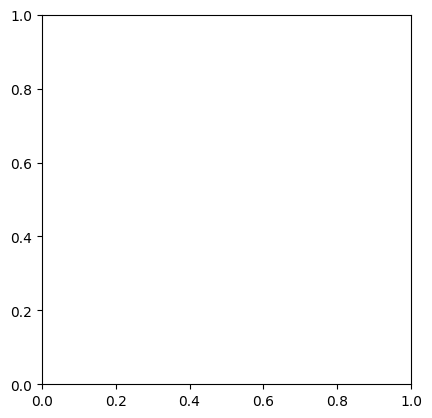

In [154]:
plt.imshow(activated_image)


In [143]:
activated_image = np.squeeze(activated_image)
height, width, channels = activated_image.shape


ValueError: not enough values to unpack (expected 3, got 1)

In [125]:
for layer_number in [0,2,4,6]:

    print(f"--- Observing the effect of the convolutional layer number {layer_number}... ---")
    print("")

    temp_number_kernels = model.layers[layer_number].weights[0].shape[-1]
    print(f"{temp_number_kernels} kernels were applied and here are all the activations of this Conv2D Layer:")

    fig, axes = plt.subplots(int(temp_number_kernels/4),4, figsize=(20,7))

    for ax, kernel_number in zip(axes.flat,range(temp_number_kernels)):
        activation = activated_image[layer_number][image_number][:, :, kernel_number]
        ax.imshow(activation, cmap="gray")

    plt.show()


--- Observing the effect of the convolutional layer number 0... ---



IndexError: list index out of range

In [106]:
img_array = np.array(img)
img_array.shape


(224, 224, 3)

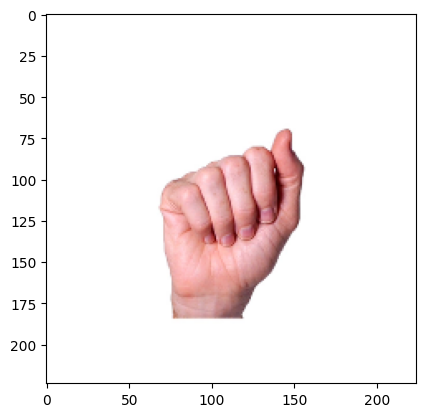

In [64]:
plt.imshow(img_array)


In [65]:
img_array = np.expand_dims(img_array, axis=0)
img_array.shape


(1, 224, 224, 3)

In [117]:
img_array = preprocess_input(img_array)
print(img_array.shape)
print(img_array)


(32, 32, 3)
[[[151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  ...
  [151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]]

 [[151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  ...
  [151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]]

 [[151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  ...
  [151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]]

 ...

 [[151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  ...
  [151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]]

 [[151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  [151.061   138.22101 131.32   ]
  ...
  [151.061   138.22101 131

In [61]:
predictions = model.predict(img_array)
predictions.shape


1/1 [==============================] - 0s 256ms/step


(1, 7, 7, 512)